# Kronig-Penney model

Here, we investigate the [Kronig-Penney model](https://en.wikipedia.org/wiki/Particle_in_a_one-dimensional_lattice) for a particle in a one-dimensional lattice. This is a boundary value problem that exhibits a band gap as in a semiconductor. 

We consider a box potential

$$ \begin{align} V(x) & = V_0 & |x| < \Delta/2 \\ & = 0 & \mathrm{otherwise} \end{align} $$

This box potential is then repeated every $a$ units. We make $N$ of them, with periodic boundary conditions:

$$
e^{ik(x+Na)} = e^{ikx}
$$

so that

$$
k = \frac{2\pi n}{Na}
$$

where $n = 0, \pm 1, \pm 2$.

The wavefunction can be expressed between barriers as:

$$
\psi(x) = A_n e^{iq(x-na)} + B_n e^{-iq(x-na)}
$$

and inside the barriers as

$$
\psi(x) = C_n e^{i\kappa(x-na)} + D_n e^{-i\kappa(x-na)}
$$

The coefficients can be solved by matching the boundary conditions for the wavefunction and its derivative, and we can then get a recursion relation to solve:

$$
\begin{equation*}\renewcommand{\arraystretch}{1.3}
\begin{pmatrix}
A_{n+1}\\
B_{n+1}
\end{pmatrix}=T(E)\begin{pmatrix}
A_{n} \\
B_{n}
\end{pmatrix}\end{equation*}
$$

The elements of the transfer matrix are

$$
T_{00} = T_{11}^* = \frac{e^{ia(a-\Delta)}}{4q\kappa}\left[ e^{i\kappa\Delta}(q+\kappa)^2 - e^{-i\kappa\Delta}(q-\kappa)^2 \right]
$$

$$
T_{01} = T_{10}^* = -\frac{ie^{iq(a-\Delta)} }{2q\kappa}(q^2-\kappa^2)\sin(\kappa\Delta) 
$$

The eigenvalues are of the form $e^{ika}$ so we solve 

$$
\mathrm{det\left(T - e^ {ika}I\right)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:

class KronigPenney : 
    def __init__(self) : 
        self.a = 1.0                             # size of unit cell - lattice spacing
        self.V_0 = -5.0                          # height of potential barrier
        self.Delta = 0.2                         # width of potential barrier

    def solve_for_k(self, E):              # to solve 2x2 eigenvalue problem
        # E is the desired enegy (input)
        # k is a list of the two solutions
        q = np.sqrt(2 * E)
        kappa = np.sqrt(2 * (E - self.V_0))
        i = 1.0j
        T = np.zeros((2,2),dtype=complex)
        T[0,0] = ( np.exp(i * q * (self.a - self.Delta)) / (4 * q * kappa) *
            ( np.exp(i * kappa * self.Delta)  * (q + kappa)**2 -
              np.exp(-i * kappa * self.Delta) * (q - kappa)**2   ) )
        T[1,1] = T[0,0].conj()
        T[0,1] = ( -i * np.exp(i * q * (self.a - self.Delta)) / (2 * q * kappa) *
            (q**2 - kappa**2) * np.sin(kappa * self.Delta)  )
        T[1,0] = T[0,1].conj()

        # solve quadratic determinantal equation
        k = np.zeros(2, dtype=complex)
        b = - (T[0,0] + T[1,1])
        c = (T[0,0] * T[1,1] - T[0,1] * T[1,0])
        k[0] = (- b + np.sqrt(b**2 - 4*c)) / 2.0
        k[1] = (- b - np.sqrt(b**2 - 4*c)) / 2.0
        
        #k,v = np.linalg.eig(T)
        k = np.log(k) / (i*self.a)
        return k

    def compute_bands(self, dE, steps):
        # dE = step size in E for search
        # steps = number of steps
        E_values = np.zeros( (steps,2) )
        rq_values = np.zeros( (steps,2) )
        E = dE
        for step in range(steps):
            q = self.solve_for_k(E)
            for j in range(2):
                rq = q[j].real
                if rq > 0.0 and rq < np.pi / self.a:
                    rq_values[step,0] = rq
                    rq_values[step,1] = -rq
                    E_values[step,0] = E
                    E_values[step,1] = E
            E += dE
        return rq_values, E_values

<IPython.core.display.Javascript object>


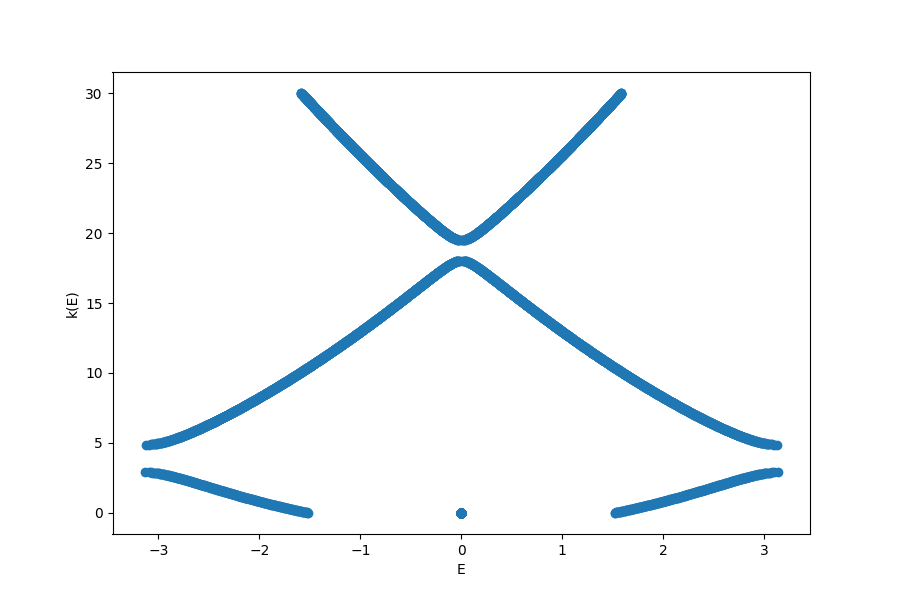

<IPython.core.display.Javascript object>


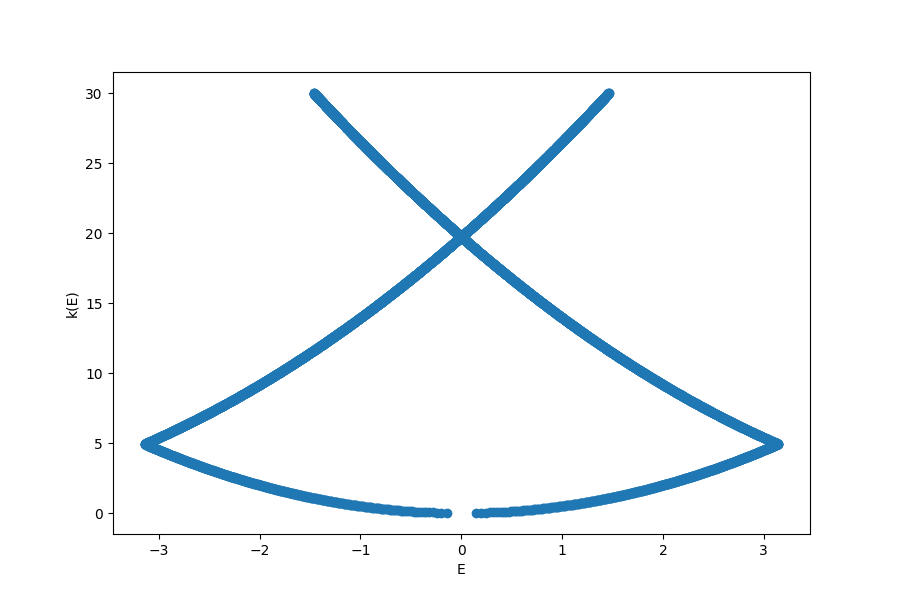

In [3]:
%matplotlib notebook 
kp = KronigPenney()
dE = 0.01
steps = 3000

rq_values1, E_values1 = kp.compute_bands(dE, steps)
kp.V_0 = 0.0

rq_values2, E_values2 = kp.compute_bands(dE, steps)

ax1 = plt.figure(1, figsize=(9,6))
plt.scatter( rq_values1.reshape(-1), E_values1.reshape(-1) )
plt.xlabel("E")
plt.ylabel("k(E)")

ax2 = plt.figure(2, figsize=(9,6))
plt.scatter( rq_values2.reshape(-1), E_values2.reshape(-1) )
plt.xlabel("E")
plt.ylabel("k(E)")

plt.show()
